In [43]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [44]:
def pre_data(df):
    df = df.values
    X, y = df[:, :-1], df[:, -1]

    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    # normalize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test


def build_model(num_features):
    # build model
    clf = keras.Sequential()
    clf.add(layers.Dense(64, input_dim = num_features, activation="relu"))
    # clf.add(layers.Dropout(0.2))
    clf.add(layers.Dense(32, activation='relu'))
    # clf.add(layers.Dropout(0.2))
    clf.add(layers.Dense(8, activation='softmax'))
    clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return clf


def plot_heatmap(class_names, y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize = (15,15))
    heatmap = sns.heatmap(cm, fmt = "g", cmap="Blues", annot=True, ax = ax)
    ax.set_xlabel("Predicted class")
    ax.set_ylabel("True class")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)    
    

def plot_history(history, param):
    """
    Shows how the model performs (in terms of accuracy and loss) over several epochs.
    """
    if param == 'acc':
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    elif param == 'loss':
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper right')
        plt.show()

In [45]:
def main():
    df = pd.read_csv("./cover_data.csv")
    cols = df.columns.tolist()
    
    features, label = cols[:-1], cols[-1]
    X_train, X_test, y_train, y_test = pre_data(df)
    
    model = build_model(len(features))
    model.summary()
    
    
    epochs = 100
    batch_size = 1024
    history = clf.fit(X_train,
                        y_train,
                        epochs = epochs,
                        batch_size = batch_size,
                        validation_split=0.1,
                        verbose = 1)

    plot_history(history, 'acc')
    plot_history(history, 'loss')

    score = clf.evaluate(X_test, y_test, verbose=1)
    print(f"Test loss : {score[0]}")
    print(f"Test accuracy : {score[1]}")

    y_pred = clf.predict(X_test)
    # convert pred to discrete values
    y_pred = np.argmax(y_pred, axis = 1)
    class_names = ['Spruce/Fir', 'Lodgepole Pine',
                'Ponderosa Pine', 'Cottonwood/Willow',
                'Aspen', 'Douglas-fir', 'Krummholz']
    print(classification_report(y_test, y_pred, target_names=class_names))
    plot_heatmap(class_names, y_pred, y_test)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                3520      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 264       
Total params: 5,864
Trainable params: 5,864
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
409/409 [==============================] - 4s 9ms/step - loss: 0.4583 - accuracy: 0.8034 - val_loss: 0.3831 - val_accuracy: 0.8385
Epoch 2/100
409/409 [==============================] - 3s 8ms/step - loss: 0.4573 - accuracy: 0.8032 - val_loss: 0.3825 - val_accuracy: 0.8386
Epoch 3/100
409/409 [==============================] - 3s 8ms/step - loss: 0.4574 - accuracy: 0.

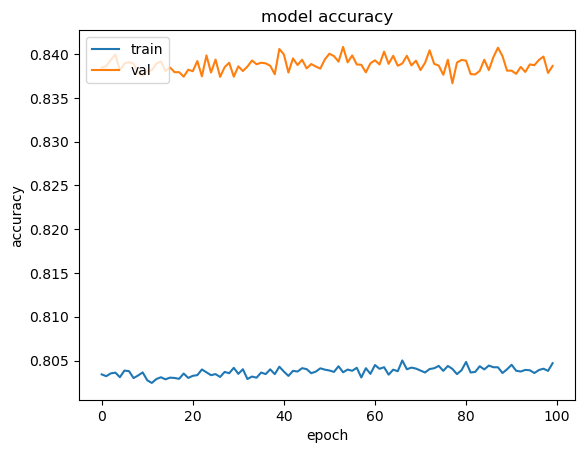

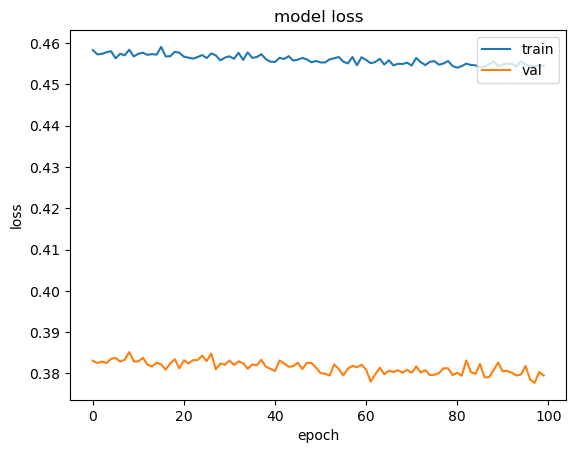

3632/3632 [==============================] - 18s 5ms/step - loss: 0.3828 - accuracy: 0.8373
Test loss : 0.38283583521842957
Test accuracy : 0.8372847437858582
                   precision    recall  f1-score   support

       Spruce/Fir       0.87      0.78      0.82     42557
   Lodgepole Pine       0.82      0.91      0.87     56500
   Ponderosa Pine       0.79      0.87      0.83      7121
Cottonwood/Willow       0.82      0.63      0.71       526
            Aspen       0.81      0.33      0.47      1995
      Douglas-fir       0.71      0.61      0.66      3489
        Krummholz       0.88      0.81      0.84      4015

         accuracy                           0.84    116203
        macro avg       0.82      0.71      0.74    116203
     weighted avg       0.84      0.84      0.83    116203



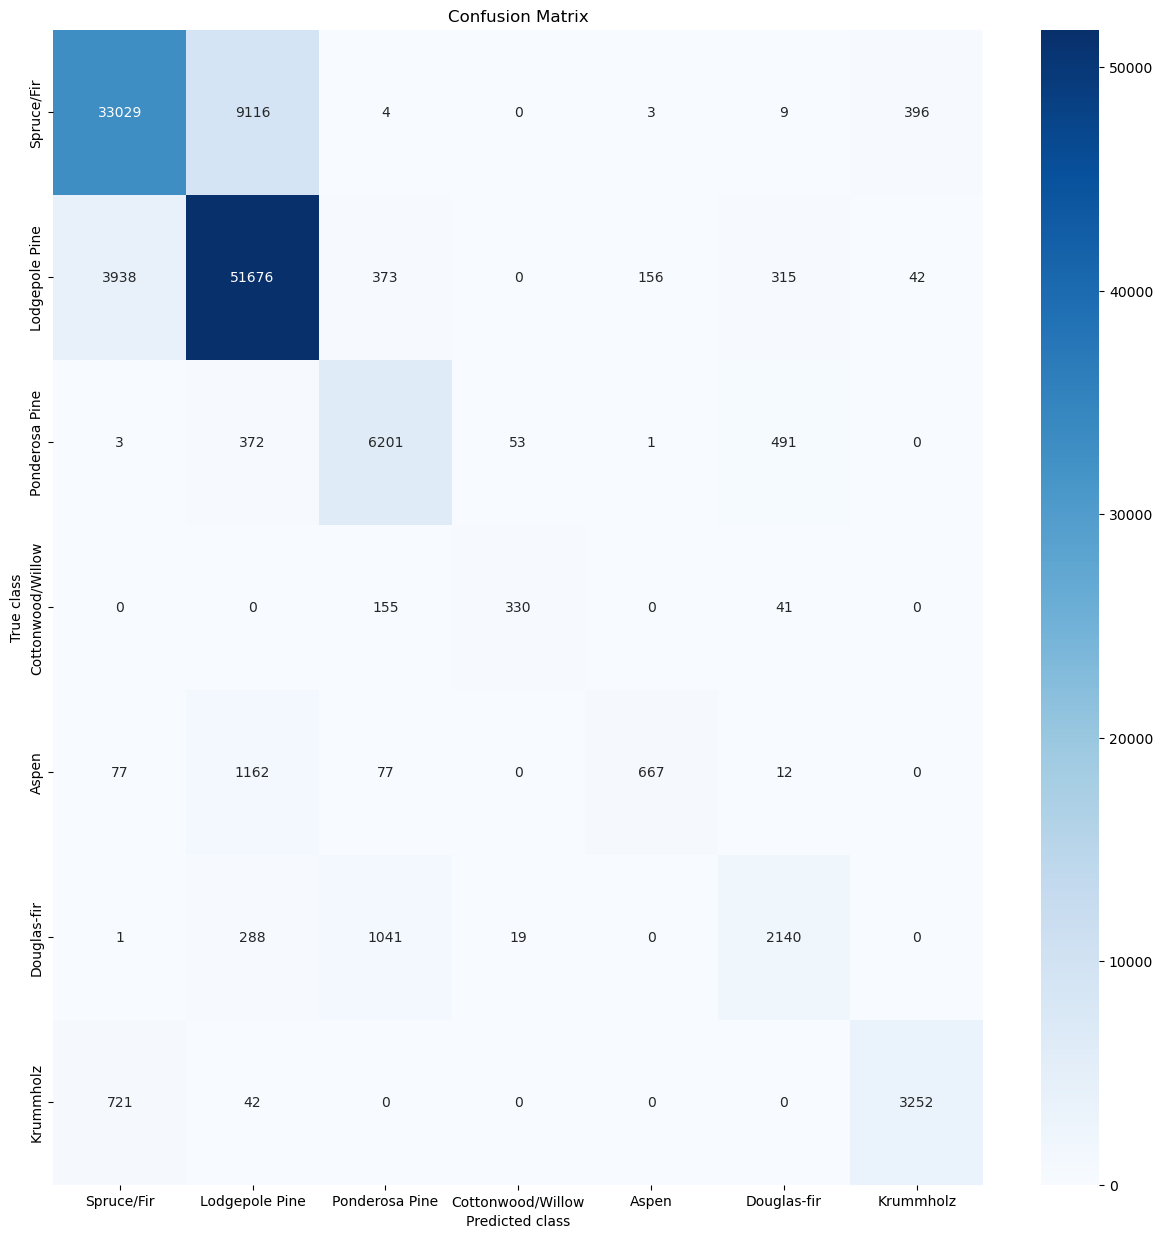

In [46]:
if __name__ == "__main__":
    main()